# WFE and PSF Metrics for VisMCAO
3000 actuators, 6 LGS (7mag), 1 TT (8mag)

In [1]:
from paarti.utils import maos_utils
import matplotlib.pyplot as plt
from bpeck.mcao import act_study

In [2]:
maos_utils.print_psf_metrics_x0y0(seed=1)

Looking in ./ for simulation results...
Wavelength Strehl  FWHM_gaus   FWHM_emp r_EE80
(microns)              (mas)      (mas)  (mas)
     0.432   0.14       10.8       11.6   51.5
     0.544   0.27       12.7       13.5   43.2
     0.652   0.40       14.9       15.2   35.9
     0.810   0.55       17.2       18.2   34.7
     0.877   0.60       18.4       19.6   34.8
     1.020   0.69       20.8       22.4   37.4
     1.248   0.78       25.1       27.1   45.8
     1.673   0.87       33.1       35.9   56.2
     2.200   0.92       42.2       46.9   73.9


(array([0.432, 0.544, 0.652, 0.81 , 0.877, 1.02 , 1.248, 1.673, 2.2  ]),
 array([0.13783006, 0.27410298, 0.40370207, 0.55387676, 0.60369248,
        0.68806227, 0.77862251, 0.86980998, 0.92244064]),
 array([10.84420283, 12.72195428, 14.91250714, 17.21682479, 18.3940207 ,
        20.80705222, 25.09167518, 33.1381577 , 42.23569428]),
 array([11.60270314, 13.50734058, 15.18318639, 18.2418652 , 19.56687234,
        22.43804671, 27.09214988, 35.89342959, 46.90844681]),
 array([51.48364   , 43.22084   , 35.8626    , 34.65247333, 34.83887333,
        37.40268   , 45.7632    , 56.2353    , 73.9497    ]))

In [2]:
#act_study.print_mag_to_flux(2000, 6000, 1000, 7, 8)

In [3]:
total = maos_utils.print_wfe_metrics(seed=1)

---------------------
WaveFront Error (nm): [note, piston removed from all]
---------------------
Field Avg        Total   High_Order           TT
---------  -----------   ----------   ----------
Open             881.9        834.4        285.6
Closed           362.5        349.8         94.8

Pos  0 
-------  
Open             943.6        857.2        394.4
Closed           108.2         94.2         53.3

Pos  1 
-------  
Open             929.8        853.8        368.1
Closed           120.8        107.6         54.9

Pos  2 
-------  
Open             911.6        845.6        340.5
Closed           128.9        116.2         55.7

Pos  3 
-------  
Open             893.4        837.3        311.5
Closed           127.2        114.3         55.8

Pos  4 
-------  
Open             876.8        830.3        281.7
Closed           160.0        150.0         55.6

Pos  5 
-------  
Open             862.9        825.3        252.0
Closed           218.6        211.2         56.4

Pos

## WFE: Total, Tip-Tilt and High-Order

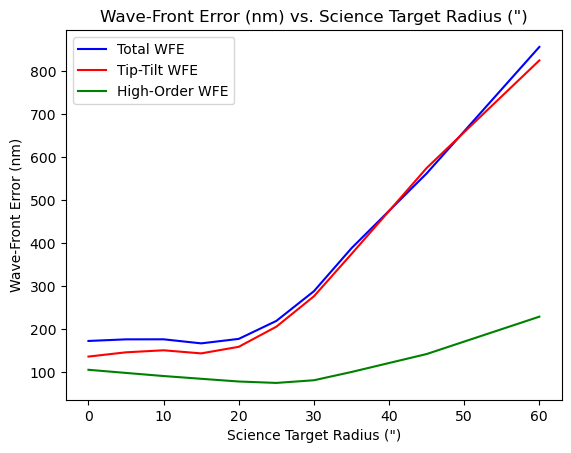

In [13]:
total_wfe = [173.0, 176.7, 176.8, 167.4, 177.8, 219.5, 288.5, 388.4, 562.1, 856.0]
tt_wfe = [136.7, 146.6, 151.3, 144.1, 159.4, 206.1, 276.7, 375.0, 574.7, 824.7]
truth_wfe = [106.0, 98.7, 91.5, 85.1, 78.8, 75.5, 81.7, 100.9, 142.6, 229.4]

psf = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]
plt.plot(psf, total_wfe, color='blue', label="Total WFE")
plt.plot(psf, tt_wfe, color='red', label="Tip-Tilt WFE")
plt.plot(psf, truth_wfe, color='green', label="High-Order WFE" )
plt.title('Wave-Front Error (nm) vs. Science Target Radius (")')
plt.xlabel('Science Target Radius (")')
plt.ylabel("Wave-Front Error (nm)")
plt.legend()
plt.show()

## Setup

In [4]:
import pylab as plt
import numpy as np
from paarti.utils import maos_utils
from paarti import psfs, psf_plots

psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200]

seed = 1

%matplotlib inline

In [5]:
mets = maos_utils.get_psf_metrics_over_field(seed=seed)
x, y, w, strehl, fwhm_g, fwhm_e, r_ee50, r_ee80 = mets

Looking in ./ for simulation results...
xx =  0 yy =  0
xx =  5 yy =  0
xx =  10 yy =  0
xx =  15 yy =  0
xx =  20 yy =  0
xx =  25 yy =  0
xx =  30 yy =  0
xx =  35 yy =  0
xx =  45 yy =  0
xx =  60 yy =  0


In [6]:
x.shape

(10, 9)

## Strehl

Text(0.5, 1.0, 'Science Target Radius (") vs. Strehl')

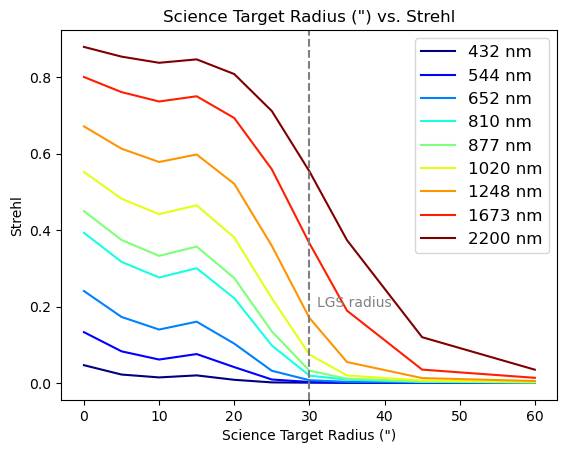

In [7]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

plt.figure(1)

for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    plt.plot(x[:, ww], strehl[:, ww], color=colors[ww], label=label)    

plt.legend(fontsize=12)
plt.xlabel('Science Target Radius (")')
plt.ylabel('Strehl')
plt.axvline(30, linestyle='--', color='grey')
plt.text(31, 0.2, 'LGS radius', color='grey')
plt.title('Science Target Radius (") vs. Strehl')

## Empirical FWHM

Text(0.5, 1.0, 'Science Target Radius (") vs. Emp. FWHM (mas)')

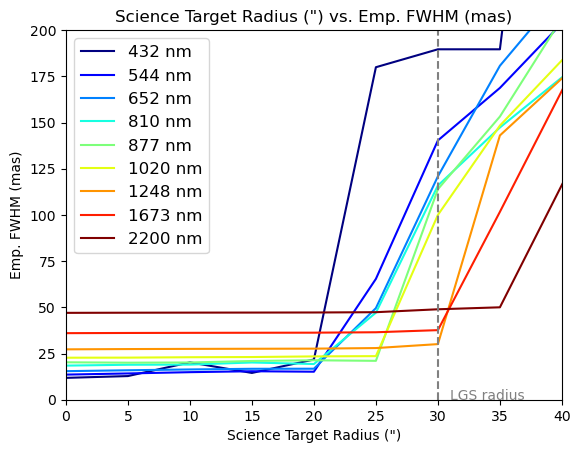

In [8]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

plt.figure(1)

for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    plt.plot(x[:, ww], fwhm_e[:, ww], color=colors[ww], label=label)    

plt.legend(fontsize=12)
plt.xlabel('Science Target Radius (")')
plt.ylabel('Emp. FWHM (mas)')
plt.axvline(30, linestyle='--', color='grey')
plt.xlim(0, 40)
plt.ylim(0, 200)
plt.text(31, 0.2, 'LGS radius', color='grey')
plt.title('Science Target Radius (") vs. Emp. FWHM (mas)')

## Encircled Energy (50 and 80)

Text(0.5, 1.0, 'Science Target Radius (") vs. EE80 Radius (mas)')

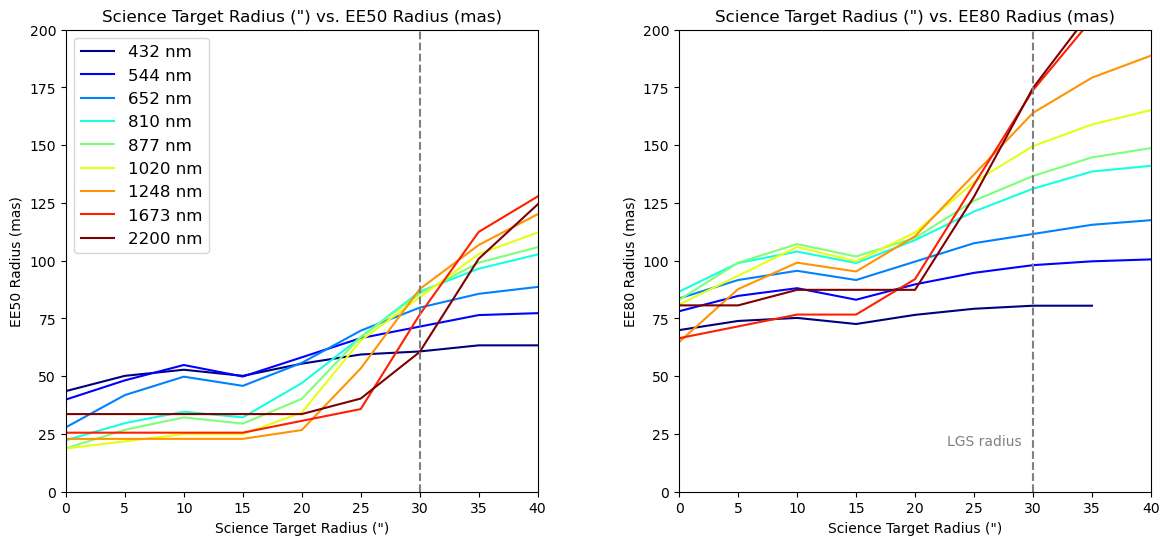

In [9]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(wspace=0.3)
    
for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    axs[0].plot(x[:, ww], r_ee50[:, ww], color=colors[ww], label=label)    
    axs[1].plot(x[:, ww], r_ee80[:, ww], color=colors[ww])    

axs[0].legend(fontsize=12)
axs[0].set_xlabel('Science Target Radius (")')
axs[1].set_xlabel('Science Target Radius (")')
axs[0].set_ylabel('EE50 Radius (mas)')
axs[1].set_ylabel('EE80 Radius (mas)')
axs[0].axvline(30, linestyle='--', color='grey')
axs[1].axvline(30, linestyle='--', color='grey')
axs[0].set_xlim(0, 40)
axs[0].set_ylim(0, 200)
axs[1].set_xlim(0, 40)
axs[1].set_ylim(0, 200)
axs[1].text(29, 20, 'LGS radius', color='grey', ha='right')
axs[0].set_title('Science Target Radius (") vs. EE50 Radius (mas)')
axs[1].set_title('Science Target Radius (") vs. EE80 Radius (mas)')